In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import imutils
import scipy.spatial.distance as dist


# pip install imutils
# python -m pip install scipy


In [2]:
img_path = ['images/000.png',
'images/001.png', 
'images/002.png', 
'images/003.png',
'images/004.png',
'images/005.png',
'images/006.png',
'images/007.png',
'images/008.png',
'images/009.png',
'images/010.png',] 


In [3]:
gt_path = ['images/GT/000.png',
'images/GT/001.png', 
'images/GT/002.png',
'images/GT/003.png',
'images/GT/004.png',
'images/GT/005.png',
'images/GT/006.png',
'images/GT/007.png',
'images/GT/008.png',
'images/GT/009.png',
'images/GT/010.png',] 



In [4]:
def readFolder(path):
    tempF = []
    for pic in path:
        temp = cv.imread(pic, 0)
        # tempF.append(cv.cvtColor(temp, cv.COLOR_BGR2RGB))
        tempF.append(temp)

    return tempF

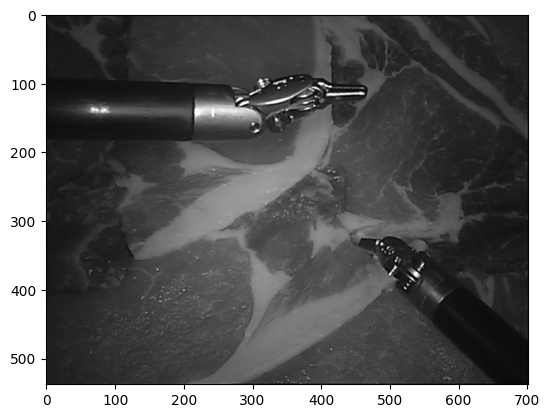

In [5]:
imgs = readFolder(img_path)
gts = readFolder(gt_path)

imgs[0]
plt.imshow(imgs[0], cmap="gray")


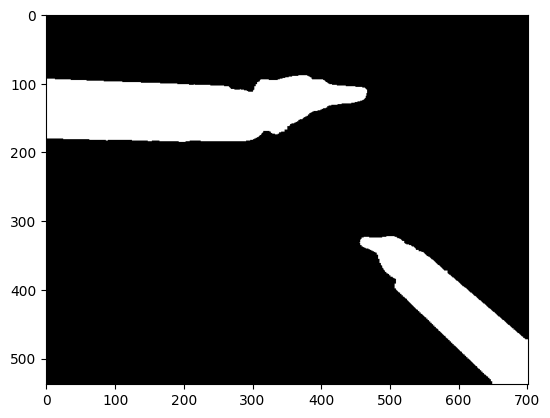

In [6]:
plt.imshow(gts[0], cmap="gray")

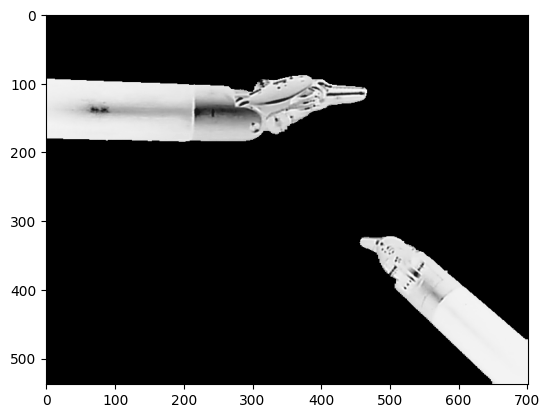

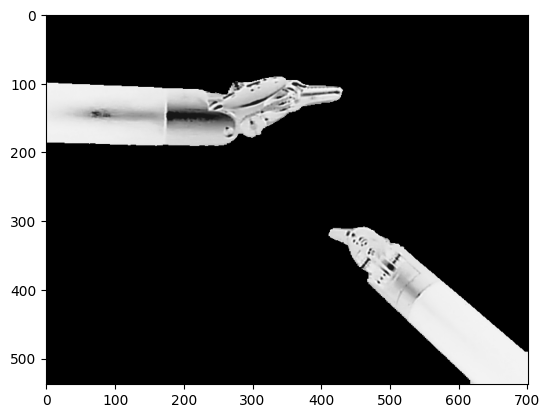

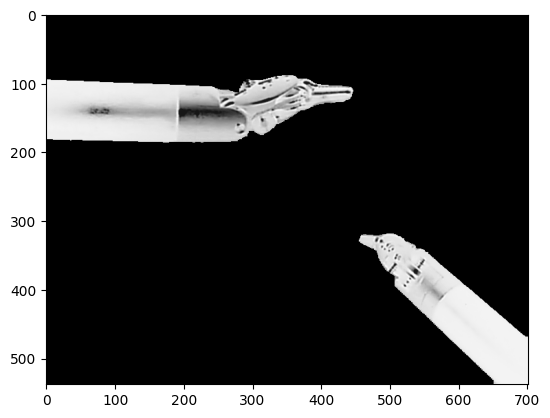

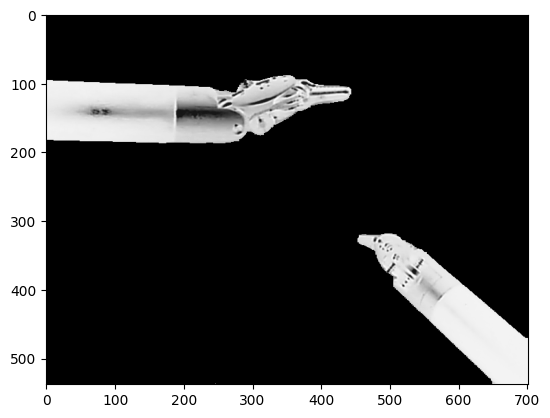

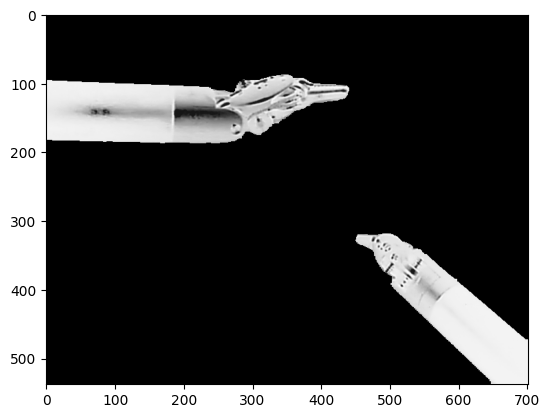

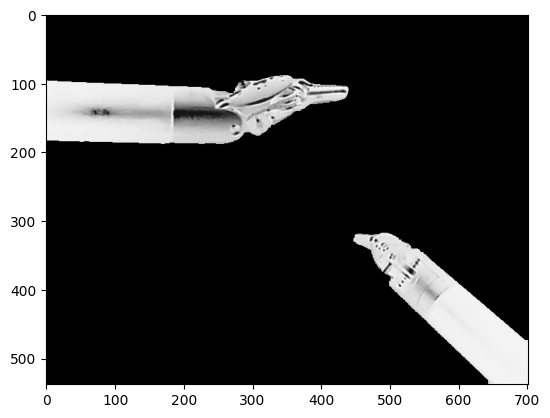

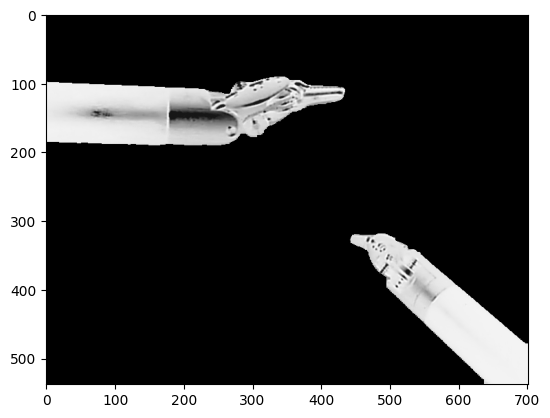

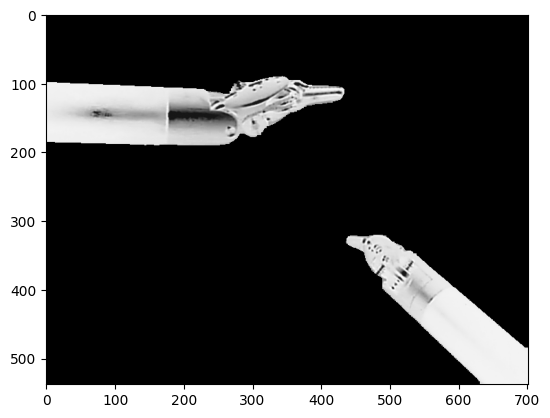

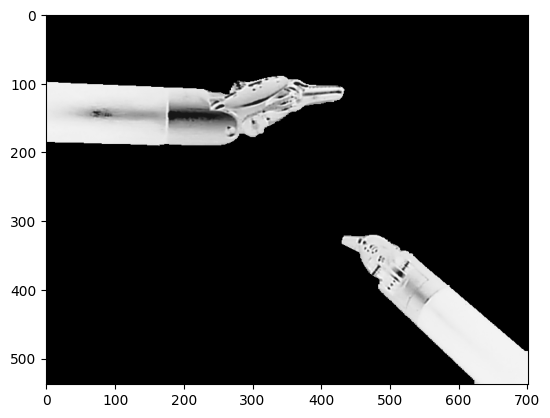

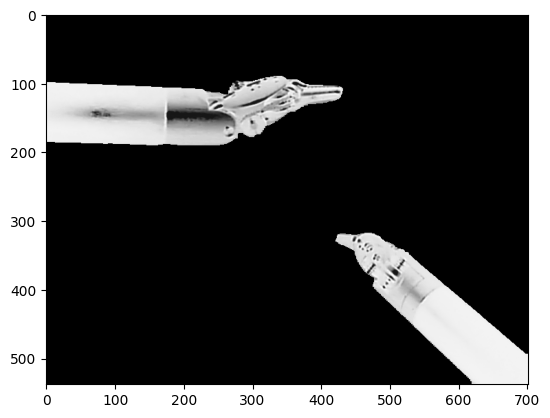

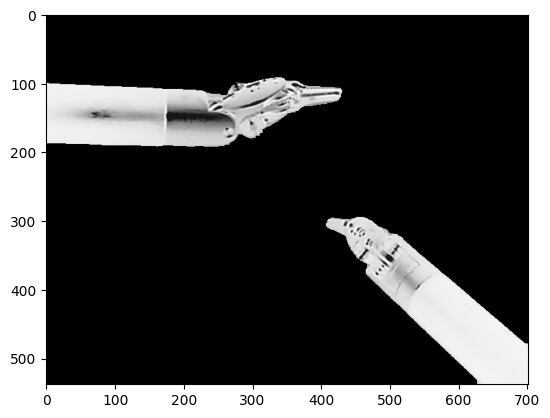

In [7]:
test = imgs[0] * gts[0]
plt.imshow(test)

for i in range(len(imgs)):
    imgs[i] = imgs[i] * gts[i]
    plt.imshow(imgs[i], cmap="gray")
    plt.show()

In [8]:
# detector = cv.HomogeneusBgDetector()

# contours = detector.detect_object(test)
# plt.imshow(contours)

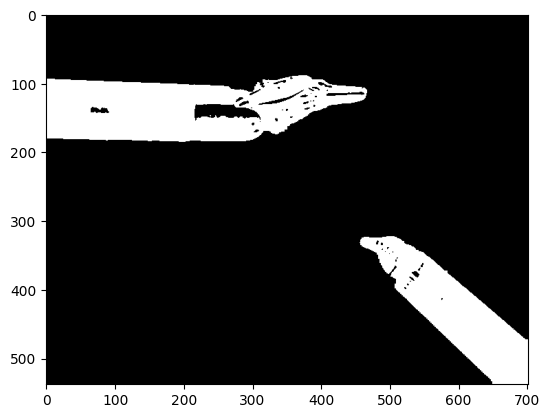

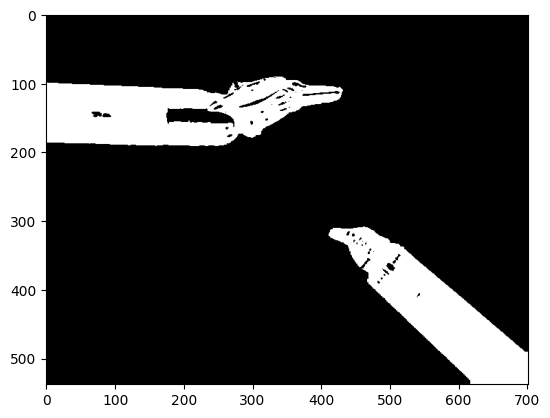

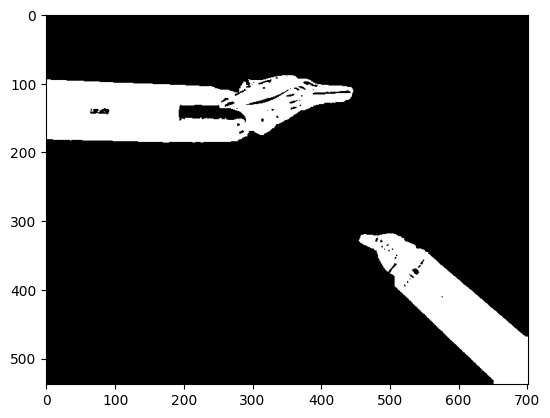

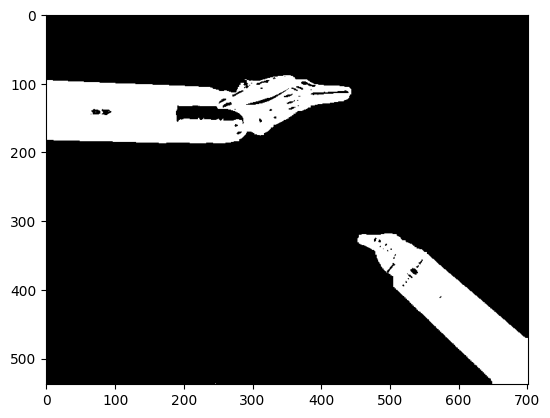

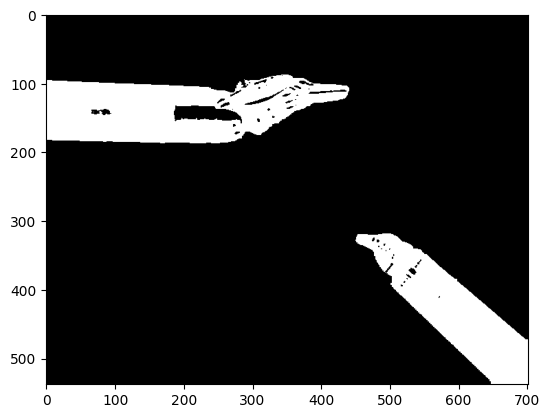

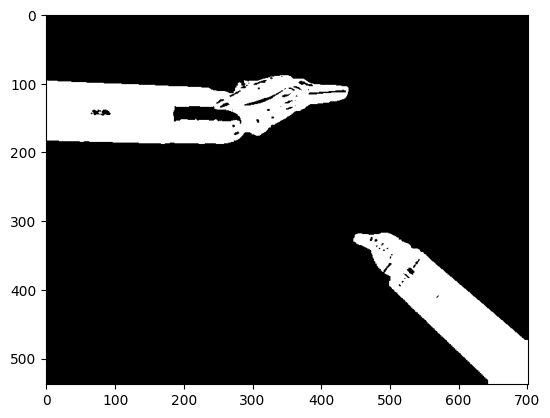

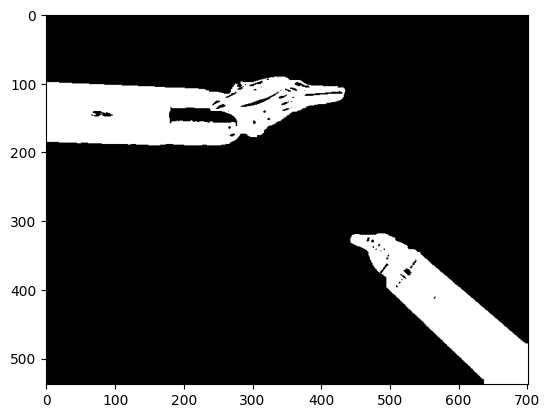

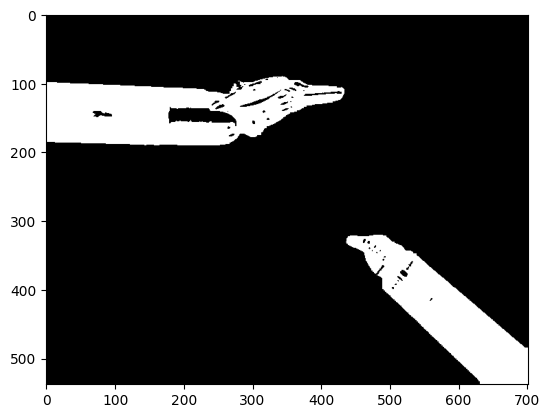

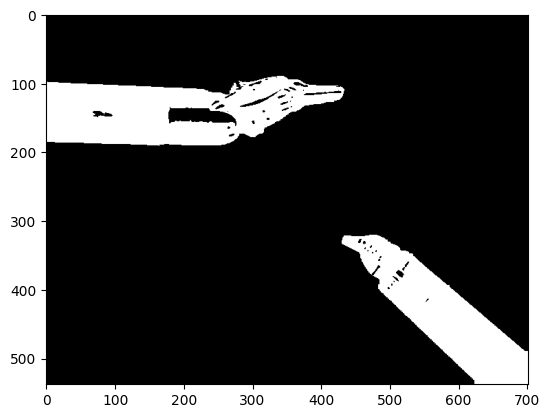

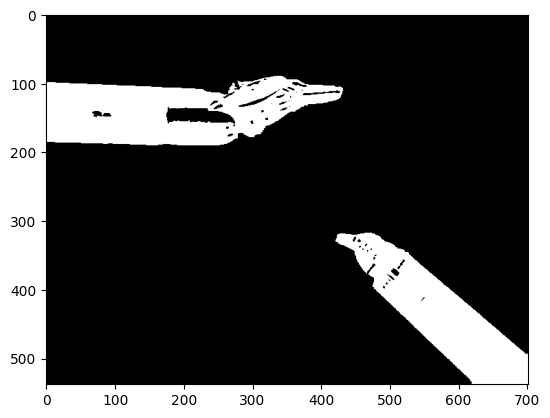

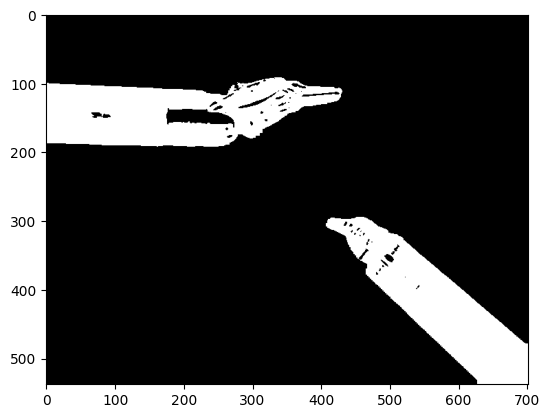

In [9]:
threshs = []
thresh_imgs = []
for i in range(len(imgs)):
    thresh_temp, thresh_img_temp = cv.threshold(imgs[i], 110, 255, cv.THRESH_BINARY)
    threshs.append(thresh_temp)
    thresh_imgs.append(thresh_img_temp)

    plt.imshow(thresh_imgs[i], cmap="gray")
    plt.show()


#thresh, thresh_img = cv.threshold(imgs[0], 110, 255, cv.THRESH_BINARY)

#plt.imshow(thresh_img, cmap="gray")

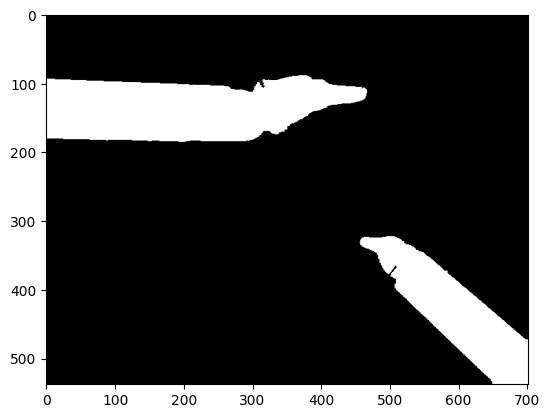

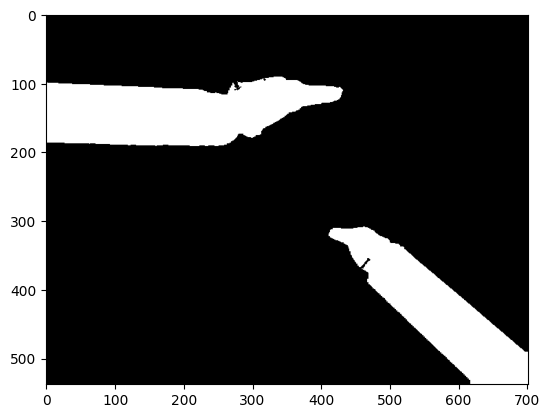

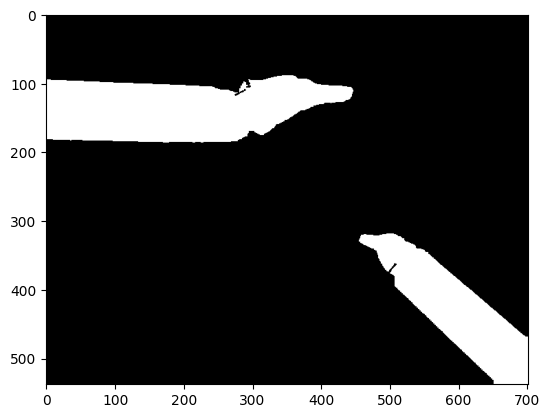

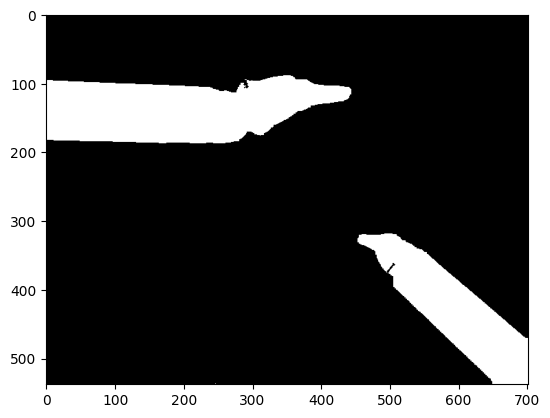

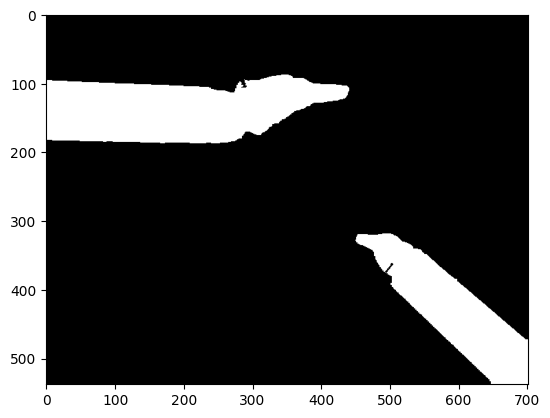

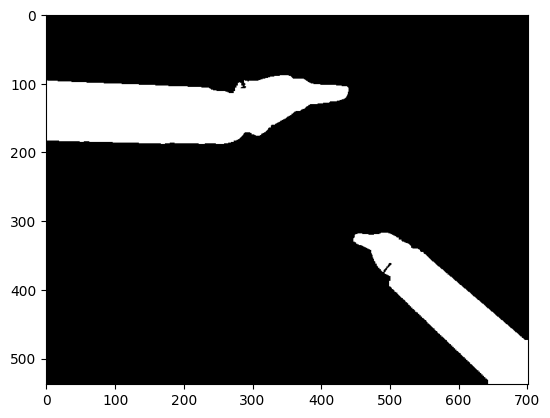

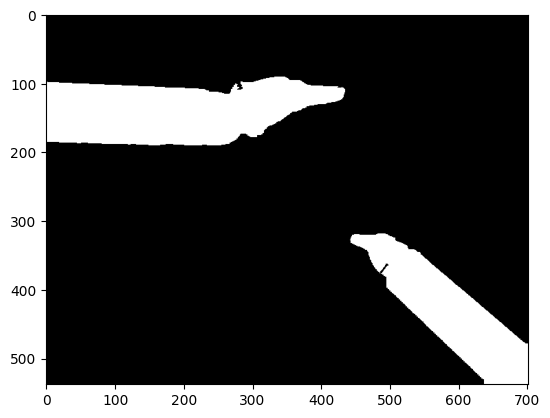

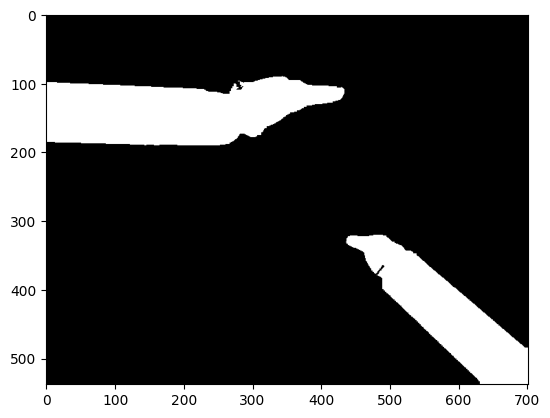

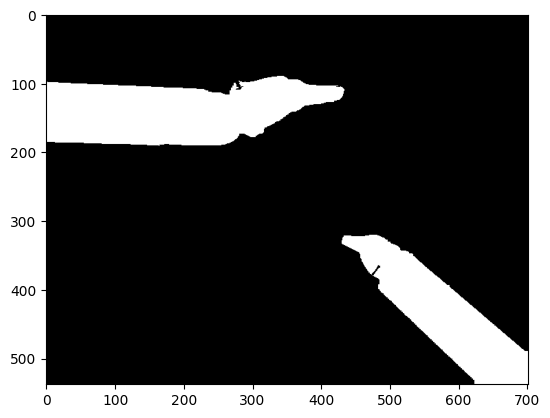

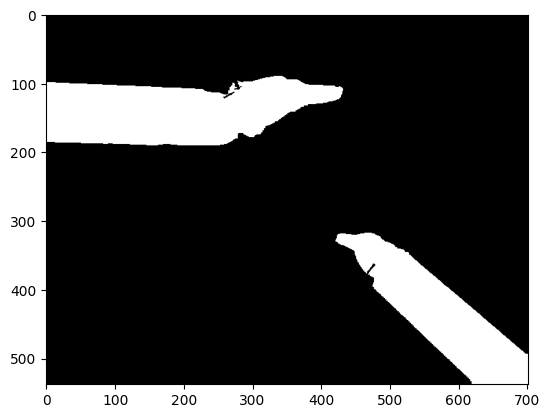

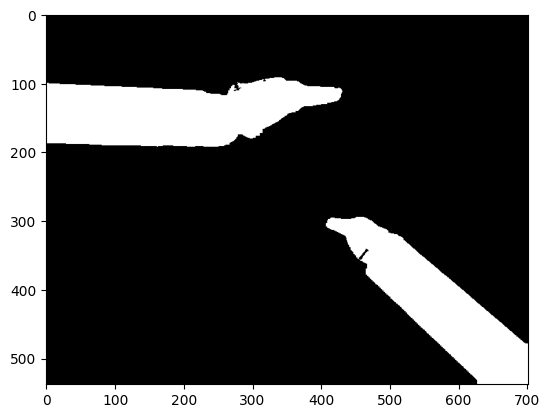

In [10]:
def filling(im_th):
    im_floodfill = im_th.copy()
 
    # Mask used to flood filling.
    # Notice the size needs to be 2 pixels than the image.
    h, w = im_th.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    
    # Floodfill from point (0, 0)
    cv.floodFill(im_floodfill, mask, (0,0), 255);
    
    # Invert floodfilled image
    im_floodfill_inv = cv.bitwise_not(im_floodfill)
    
    # Combine the two images to get the foreground.
    im_out = im_th | im_floodfill_inv

    return im_out

filled_imgs = []

for i in range(len(thresh_imgs)):
    temp_filled = filling(thresh_imgs[i])

    filled_imgs.append(temp_filled)

    plt.imshow(temp_filled, cmap="gray")
    plt.show()

#filled = filling(thresh_img)
#plt.imshow(filled, cmap="gray")    

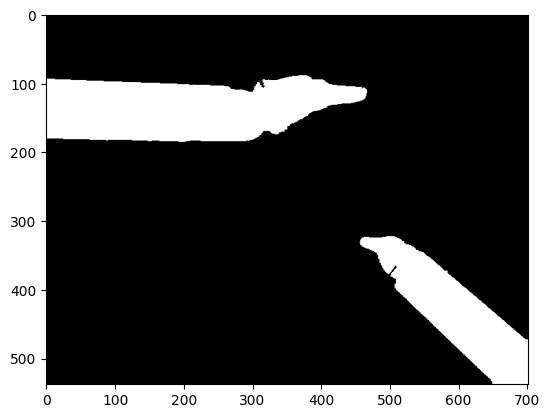

Total # of Contours:  2


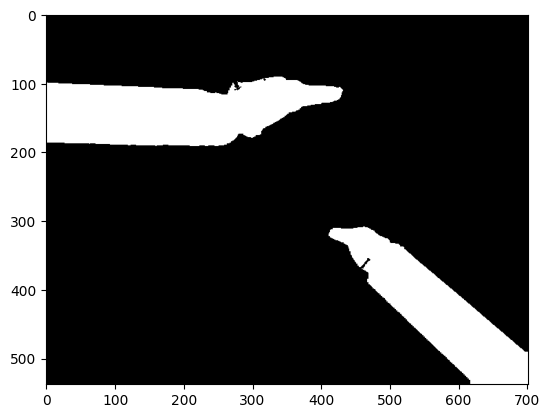

Total # of Contours:  2


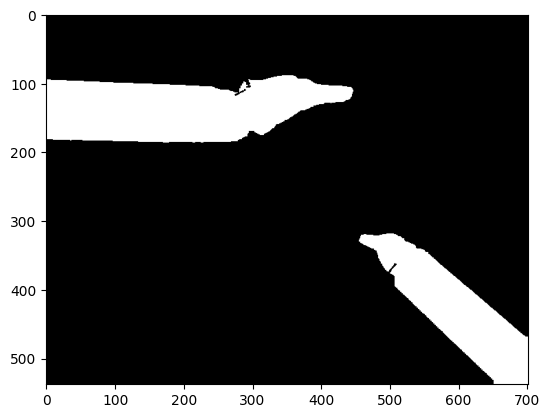

Total # of Contours:  2


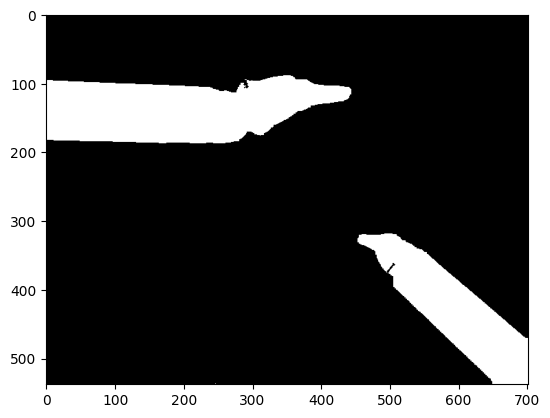

Total # of Contours:  3


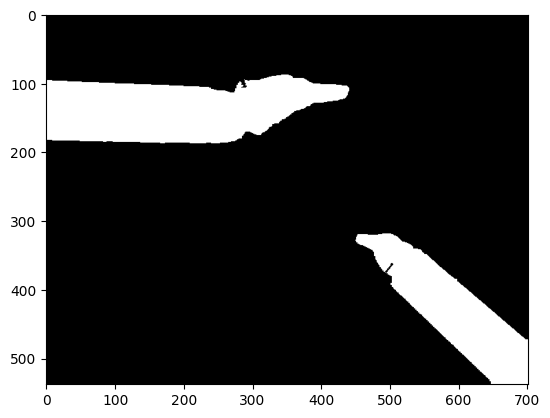

Total # of Contours:  2


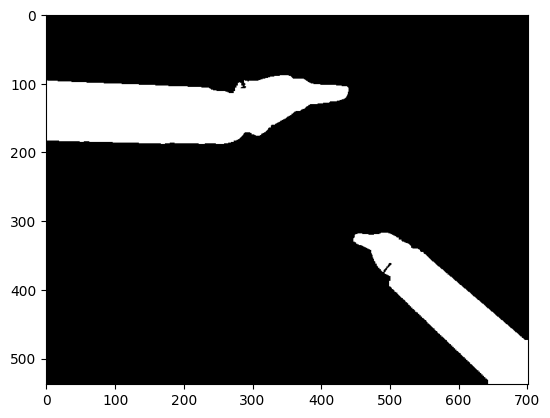

Total # of Contours:  2


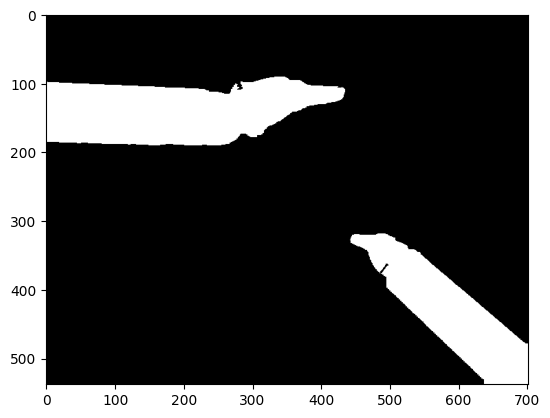

Total # of Contours:  2


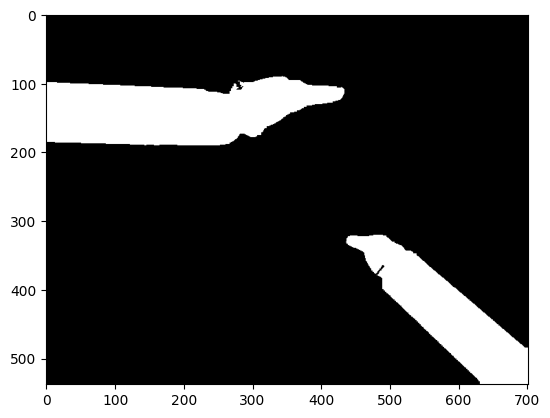

Total # of Contours:  2


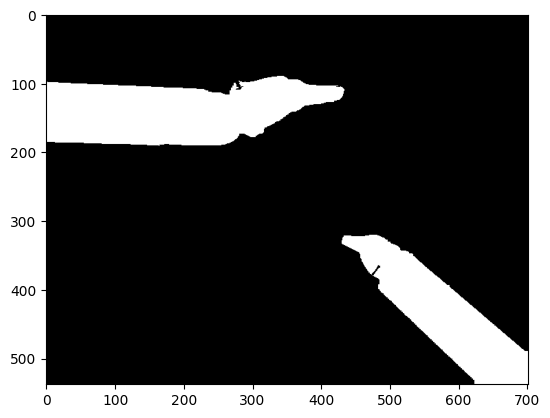

Total # of Contours:  2


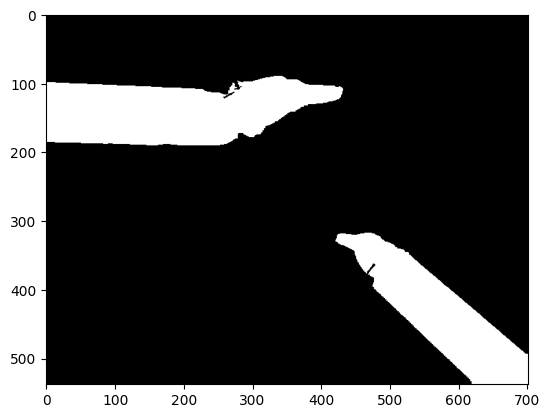

Total # of Contours:  2


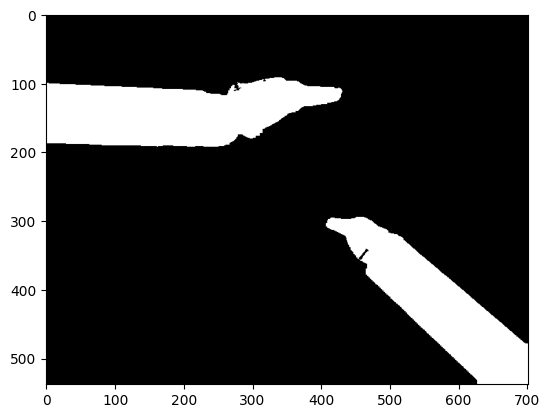

Total # of Contours:  2


In [11]:
for i in range(len(filled_imgs)):
    conts = cv.findContours(filled_imgs[i], cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    #print('Total # of Contours: ', len(conts))
    conts = imutils.grab_contours(conts)
    
    plt.imshow(filled_imgs[i], cmap="gray")
    plt.show()

    print('Total # of Contours: ', len(conts))


#conts = cv.findContours(filled, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
#print('Total # of Contours: ', len(conts))
#conts = imutils.grab_contours(conts)
#print('Total # of Contours: ', len(conts))

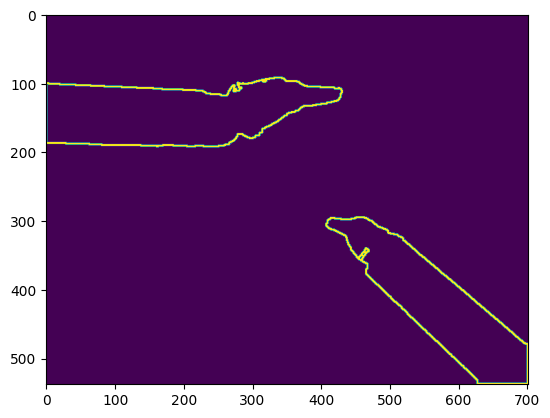

In [12]:
cont_img = np.zeros(thresh_imgs[9].shape)
cont_img = cv.drawContours(cont_img, conts, -1, (255, 0, 0), 2)

plt.imshow(cont_img)

#cont_img = np.zeros(thresh_img.shape)
#cont_img = cv.drawContours(cont_img, conts, -1, (255, 0, 0), 2)

#plt.imshow(cont_img)

In [13]:
""" cont_img = np.zeros(thresh_img.shape)

def midPoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) / 2, (ptA[1] + ptB[1]) / 2)

for c in conts:
    box = cv.minAreaRect(c)
    #print(box)
    box = cv.boxPoints(box)
    box = np.array(box, dtype='int')

    cont_img = cv.drawContours(cont_img, [c], -1, (255, 0, 0), 2)
    cont_img = cv.drawContours(cont_img, [box], -1, (255, 255, 255), 1)

    for (x,y) in box:
        cv.circle(cont_img, (x, y), 3, (255, 0, 0), 3)
        # topLeft, topRight, bottomRight, bottomLeft
        (tl, tr, br, bl) = box

        #calc top and bottm midpoints
        (tlX, trX) = midPoint(tl, tr)
        (brX, blX) = midPoint(br, bl)

        #top and bottom midpoints
        cv.circle(cont_img, (int(tlX), int(trX)), 3, (255, 0, 0), 3)
        cv.circle(cont_img, (int(brX), int(blX)), 3, (255, 0, 0), 3)

        #top to bottm line
        cv.line(cont_img, (int(tlX), int(trX)), (int(brX), int(blX)), (255, 0, 0), 1)

        #calc distance based on midpoints
        dA = dist.euclidean((tlX, trX), (brX, blX))

        #print the size
        cv.putText(cont_img, "{:.1f} px".format(dA), (int(tlX) - 10, int(trX) - 10),
        cv.FONT_HERSHEY_COMPLEX, 0.4, (255, 255, 255), 1)


        ############################################################


        #calc left and right midpoints
        (tlX, trX) = midPoint(tl, bl)
        (brX, blX) = midPoint(tr, br)

        #left and right midpoints
        cv.circle(cont_img, (int(tlX), int(trX)), 3, (255, 0, 0), 3)
        cv.circle(cont_img, (int(brX), int(blX)), 3, (255, 0, 0), 3)

        #left to right line
        cv.line(cont_img, (int(tlX), int(trX)), (int(brX), int(blX)), (255, 0, 0), 1)

        #calc distance based on midpoints
        dB = dist.euclidean((tlX, trX), (brX, blX))

        #print the size
        cv.putText(cont_img, "{:.1f} px".format(dB), (int(brX) + 10, int(blX) + 10),
        cv.FONT_HERSHEY_COMPLEX, 0.4, (255, 255, 255), 1)


        ############################################################


        #topr to bottoml line
        cv.line(cont_img, (tr), (bl), (255, 0, 0), 1)

        dC = dist.euclidean((tr), (bl))

        cv.putText(cont_img, "{:.1f} px".format(dC), tr - 15,
        cv.FONT_HERSHEY_COMPLEX, 0.4, (255, 255, 255), 1)


        ############################################################


        #surface
        surface = (dA + dB) * 2

        cv.putText(cont_img, "Surface: {:.1f} px".format(surface), tr - 50,
        cv.FONT_HERSHEY_COMPLEX, 0.4, (255, 255, 255), 1)

        #area
        area = dA * dB

        cv.putText(cont_img, "Area: {:.1f} px".format(area), tr - 35,
        cv.FONT_HERSHEY_COMPLEX, 0.4, (255, 255, 255), 1)




plt.figure(figsize=(15, 15))
plt.imshow(cont_img, cmap="gray")
plt.show()     """

' cont_img = np.zeros(thresh_img.shape)\n\ndef midPoint(ptA, ptB):\n    return ((ptA[0] + ptB[0]) / 2, (ptA[1] + ptB[1]) / 2)\n\nfor c in conts:\n    box = cv.minAreaRect(c)\n    #print(box)\n    box = cv.boxPoints(box)\n    box = np.array(box, dtype=\'int\')\n\n    cont_img = cv.drawContours(cont_img, [c], -1, (255, 0, 0), 2)\n    cont_img = cv.drawContours(cont_img, [box], -1, (255, 255, 255), 1)\n\n    for (x,y) in box:\n        cv.circle(cont_img, (x, y), 3, (255, 0, 0), 3)\n        # topLeft, topRight, bottomRight, bottomLeft\n        (tl, tr, br, bl) = box\n\n        #calc top and bottm midpoints\n        (tlX, trX) = midPoint(tl, tr)\n        (brX, blX) = midPoint(br, bl)\n\n        #top and bottom midpoints\n        cv.circle(cont_img, (int(tlX), int(trX)), 3, (255, 0, 0), 3)\n        cv.circle(cont_img, (int(brX), int(blX)), 3, (255, 0, 0), 3)\n\n        #top to bottm line\n        cv.line(cont_img, (int(tlX), int(trX)), (int(brX), int(blX)), (255, 0, 0), 1)\n\n        #calc d

In [56]:
def calculate(thresh_img):
    cont_img = np.zeros(thresh_img.shape)

    def midPoint(ptA, ptB):
        return ((ptA[0] + ptB[0]) / 2, (ptA[1] + ptB[1]) / 2)


    filled = filling(thresh_img) 
    conts = cv.findContours(filled, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)

    actual_area = []
    actual_surface = []

    for i in range(len(conts)):
        temp_actual_area = cv.contourArea(conts[i])
        temp_actual_surface = cv.arcLength(conts[i], True)

        actual_area.append(temp_actual_area)
        actual_surface.append(temp_actual_surface)

        print("Actual area: {:.1f} px".format(temp_actual_area))
        print("Actual surface: {:.1f} px".format(temp_actual_surface))

    for c in conts:
        box = cv.minAreaRect(c)
        #print(box)
        box = cv.boxPoints(box)
        box = np.array(box, dtype='int')

        cont_img = cv.drawContours(cont_img, [c], -1, (255, 0, 0), 2)
        cont_img = cv.drawContours(cont_img, [box], -1, (255, 255, 255), 1)

        if cv.contourArea(c) < 5:
            continue

        # counter = -1

        for (x,y) in box:

            # counter += 1

            cv.circle(cont_img, (x, y), 3, (255, 0, 0), 3)
            # topLeft, topRight, bottomRight, bottomLeft
            (tl, tr, br, bl) = box

            #calc top and bottm midpoints
            (tlX, trX) = midPoint(tl, tr)
            (brX, blX) = midPoint(br, bl)

            #top and bottom midpoints
            cv.circle(cont_img, (int(tlX), int(trX)), 5, (255, 0, 0), 5)
            cv.circle(cont_img, (int(brX), int(blX)), 3, (255, 0, 0), 3)

            #top to bottm line
            cv.line(cont_img, (int(tlX), int(trX)), (int(brX), int(blX)), (255, 0, 0), 1)

            #calc distance based on midpoints
            dA = dist.euclidean((tlX, trX), (brX, blX))

            #print the size
            cv.putText(cont_img, "{:.1f} px".format(dA), (int(tlX) - 10, int(trX) - 10),
            cv.FONT_HERSHEY_DUPLEX, 0.7, (255, 255, 255), 1)


            ############################################################


            #calc left and right midpoints
            (tlX, trX) = midPoint(tl, bl)
            (brX, blX) = midPoint(tr, br)

            #left and right midpoints
            cv.circle(cont_img, (int(tlX), int(trX)), 3, (255, 0, 0), 3)
            cv.circle(cont_img, (int(brX), int(blX)), 5, (255, 0, 0), 5)

            #left to right line
            cv.line(cont_img, (int(tlX), int(trX)), (int(brX), int(blX)), (255, 0, 0), 1)

            #calc distance based on midpoints
            dB = dist.euclidean((tlX, trX), (brX, blX))

            #print the size (int(tlX) - 10, int(trX) - 10)
            cv.putText(cont_img, "{:.1f} px".format(dB), (int(brX) + 10, int(blX) + 10),
            cv.FONT_HERSHEY_DUPLEX, 0.7, (255, 255, 255), 1)


            ############################################################


            #topr to bottoml line
            cv.line(cont_img, (tr), (bl), (255, 0, 0), 1)

            dC = dist.euclidean((tr), (bl))

            cv.putText(cont_img, "{:.1f} px".format(dC), tr - 7,
            cv.FONT_HERSHEY_DUPLEX, 0.7, (255, 255, 255), 1)


            ############################################################


            #surface
            surface = (dA + dB) * 2

            cv.putText(cont_img, "Surface: {:.1f} px".format(surface), tr - 55,
            cv.FONT_HERSHEY_DUPLEX, 0.7, (255, 255, 255), 1)

            #area
            area = dA * dB

            cv.putText(cont_img, "Area: {:.1f} px".format(area), tr - 32,
            cv.FONT_HERSHEY_DUPLEX, 0.7, (255, 255, 255), 1)

            # print("Difference between actual area and rectangle based area: {:.1f} px".format(area-actual_area[counter]))
            # print("Difference between actual surface and rectangle based surface: {:.1f} px".format(surface-actual_surface[counter]))


    plt.figure(figsize=(15, 15))
    plt.imshow(cont_img, cmap="gray")
    plt.show()  

Actual area: 18909.5 px
Actual surface: 791.2 px
Actual area: 32930.5 px
Actual surface: 1135.1 px


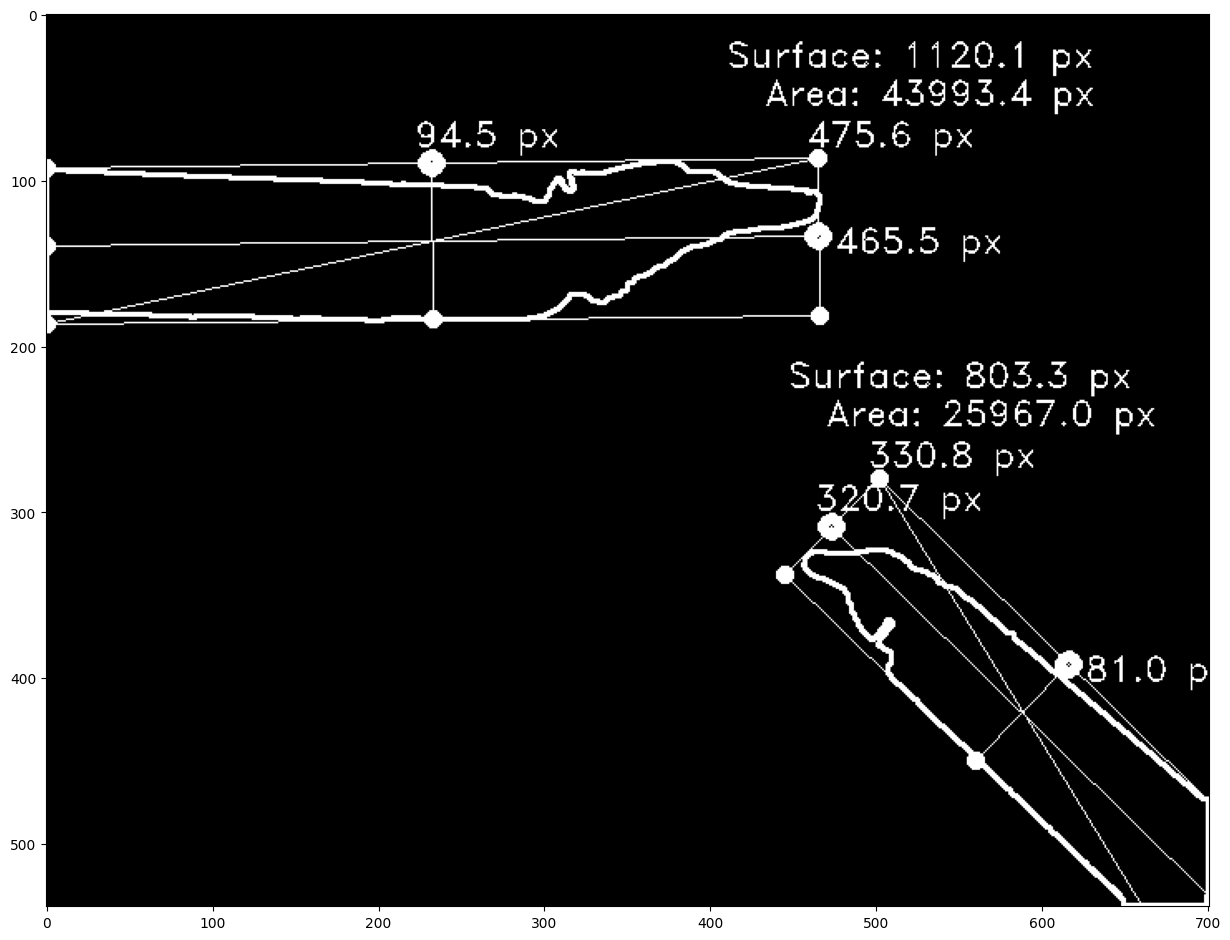

Actual area: 23065.0 px
Actual surface: 892.8 px
Actual area: 30275.5 px
Actual surface: 1094.2 px


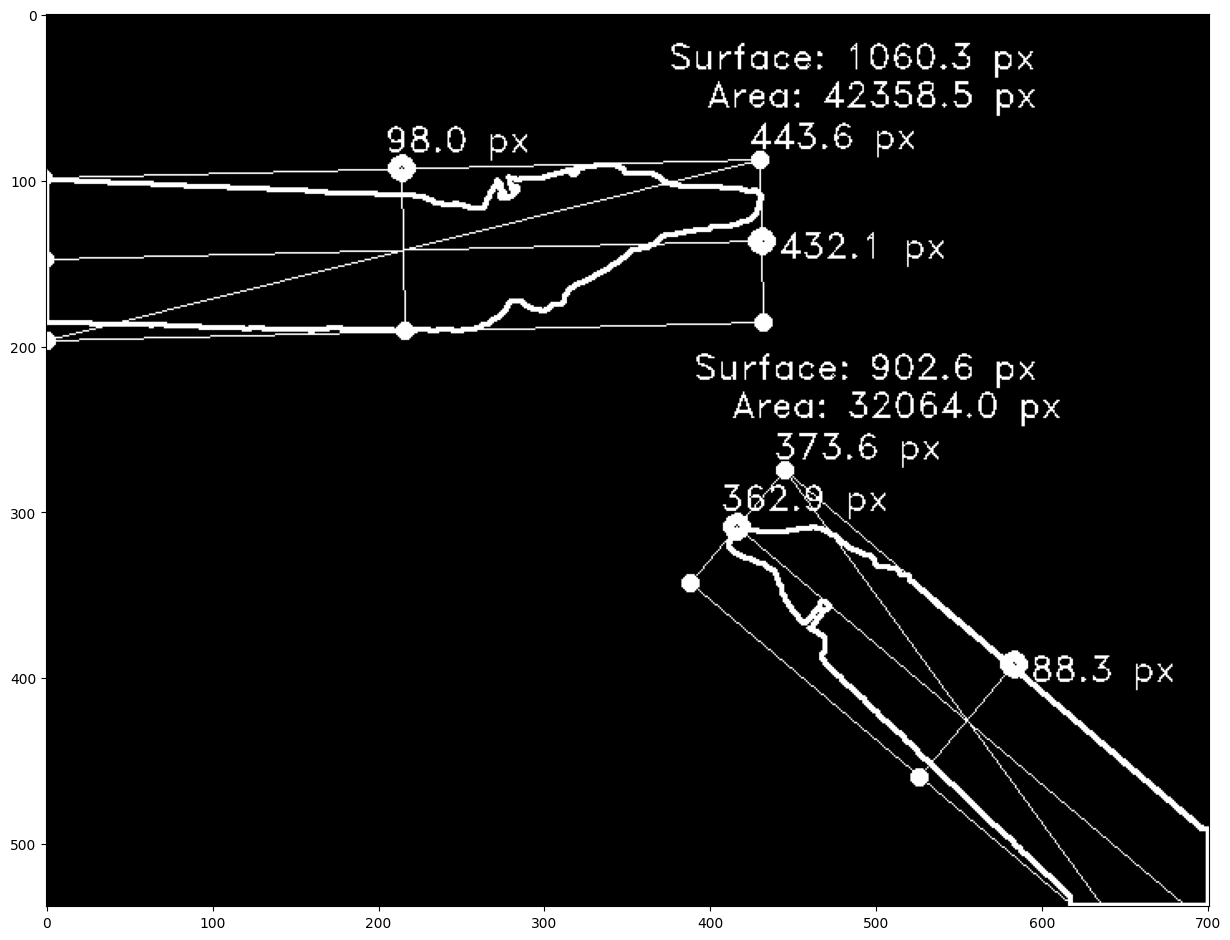

Actual area: 19235.0 px
Actual surface: 800.3 px
Actual area: 31321.5 px
Actual surface: 1136.5 px


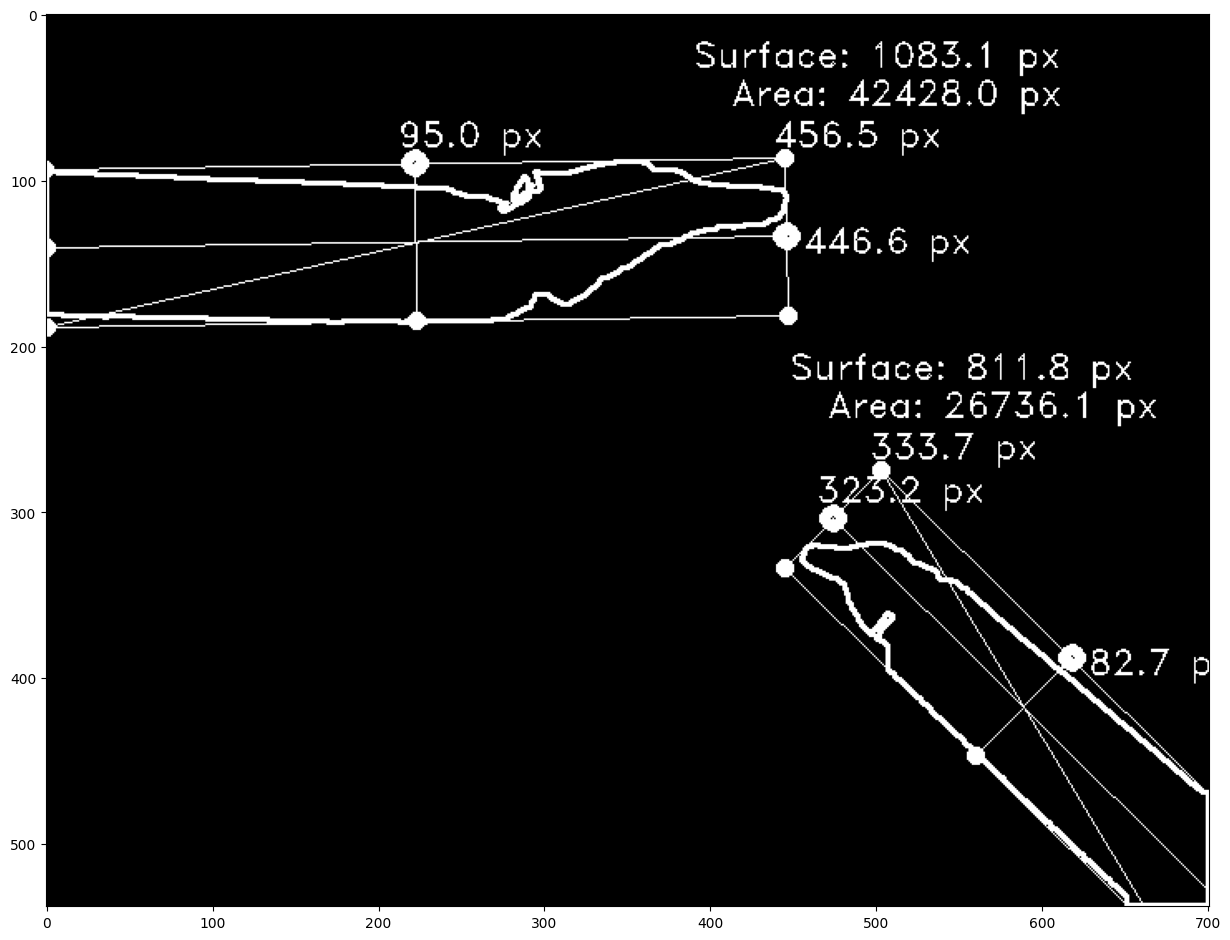

Actual area: 0.0 px
Actual surface: 0.0 px
Actual area: 19465.0 px
Actual surface: 806.3 px
Actual area: 31215.5 px
Actual surface: 1095.9 px


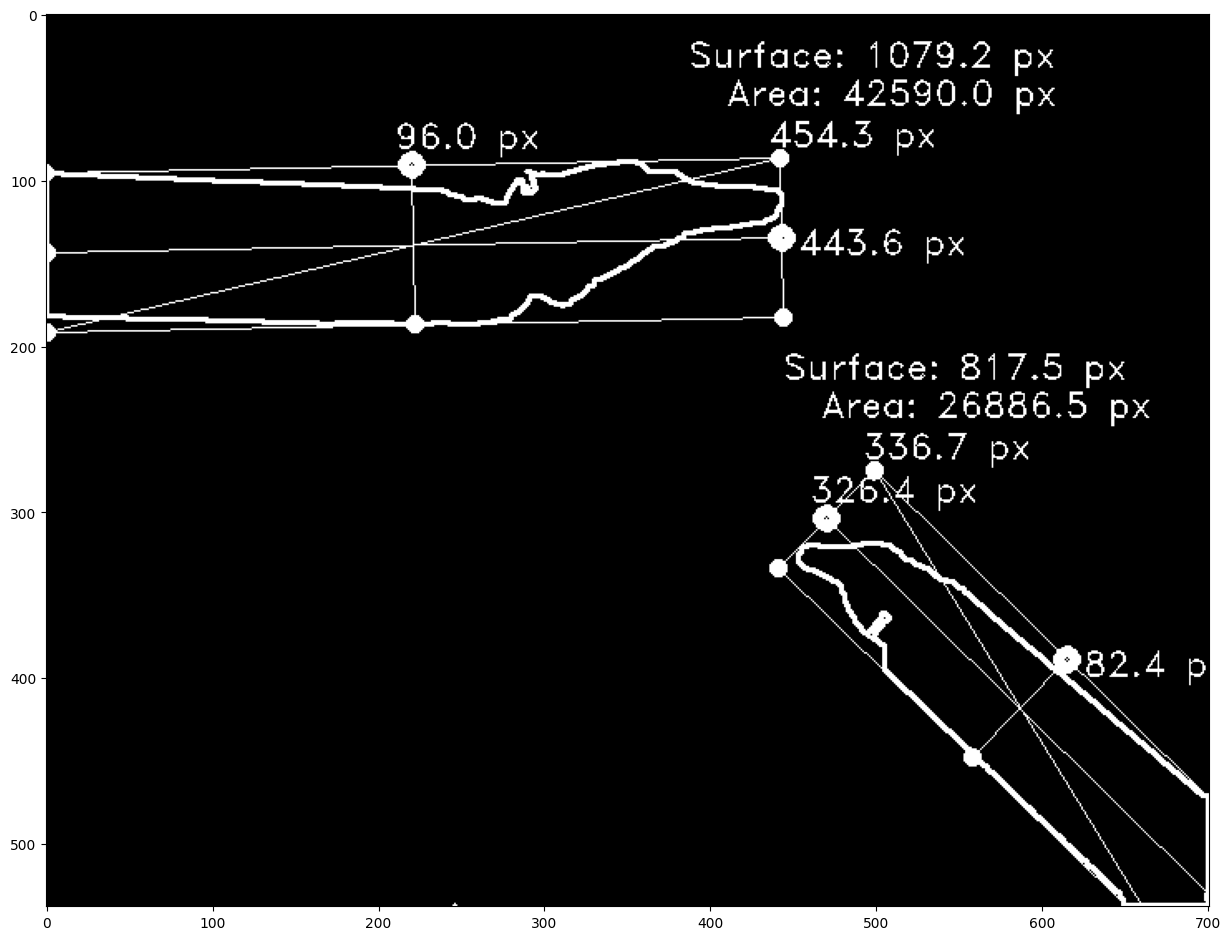

Actual area: 19657.5 px
Actual surface: 811.0 px
Actual area: 31010.5 px
Actual surface: 1088.2 px


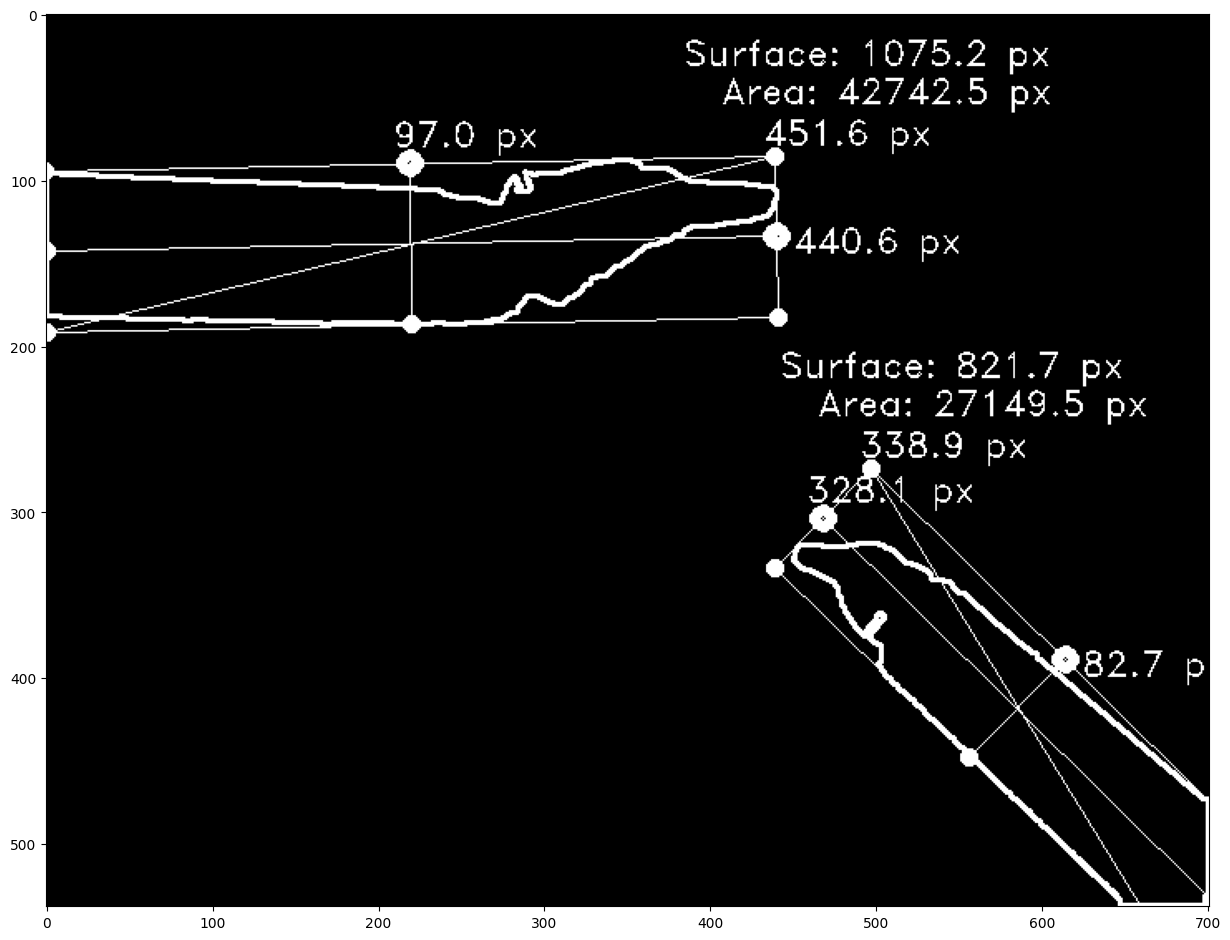

Actual area: 19956.0 px
Actual surface: 819.6 px
Actual area: 30958.0 px
Actual surface: 1080.1 px


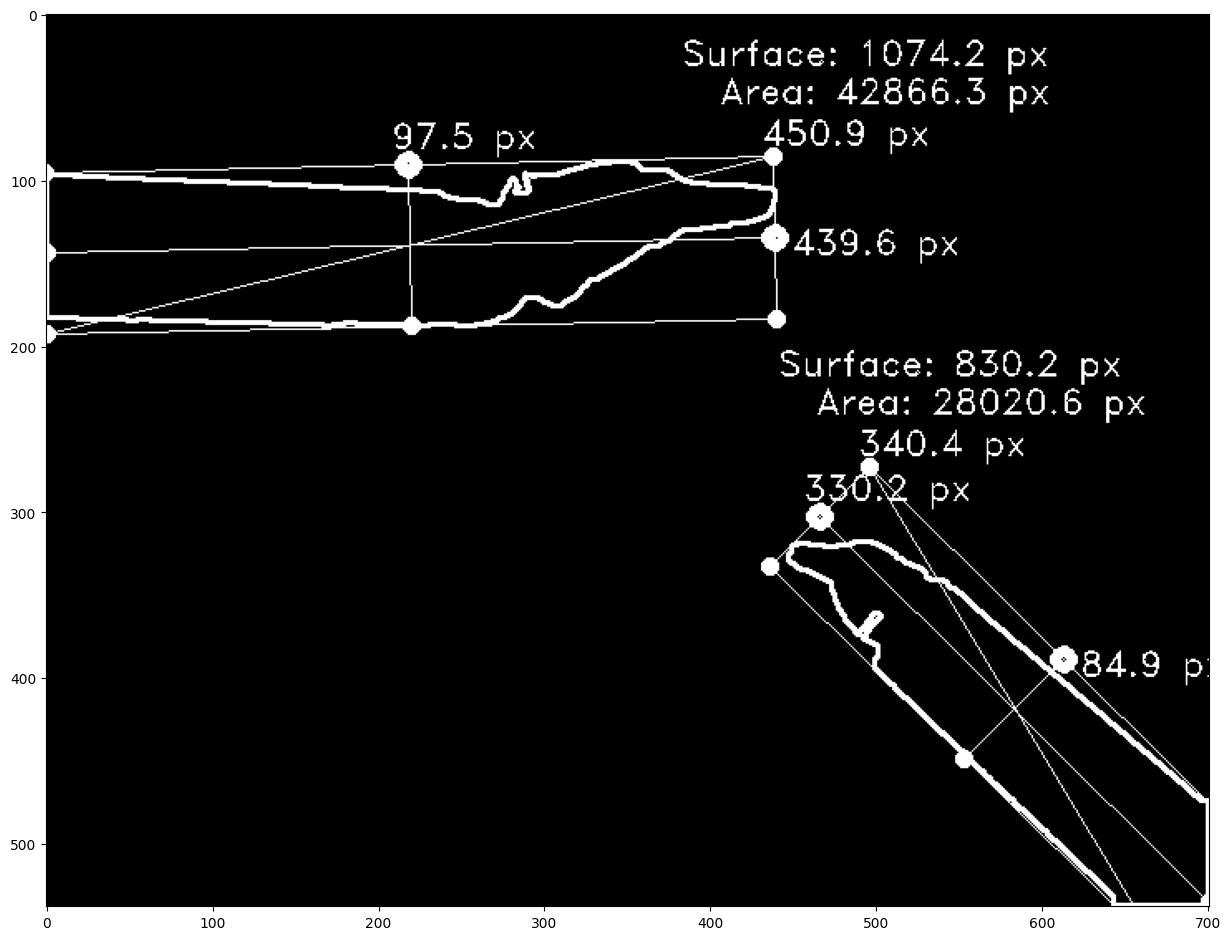

Actual area: 20261.0 px
Actual surface: 824.7 px
Actual area: 30651.5 px
Actual surface: 1077.1 px


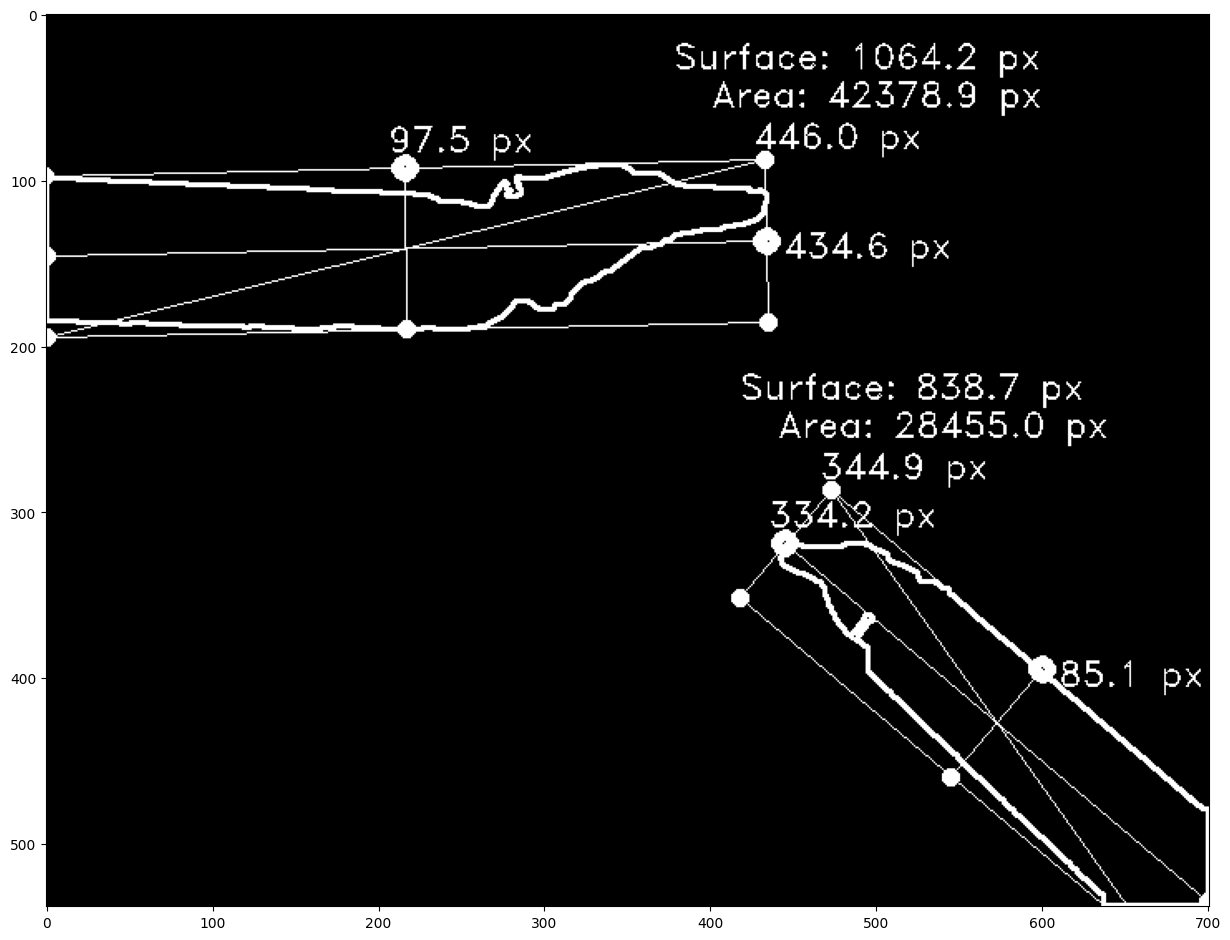

Actual area: 20553.5 px
Actual surface: 825.5 px
Actual area: 30553.0 px
Actual surface: 1084.8 px


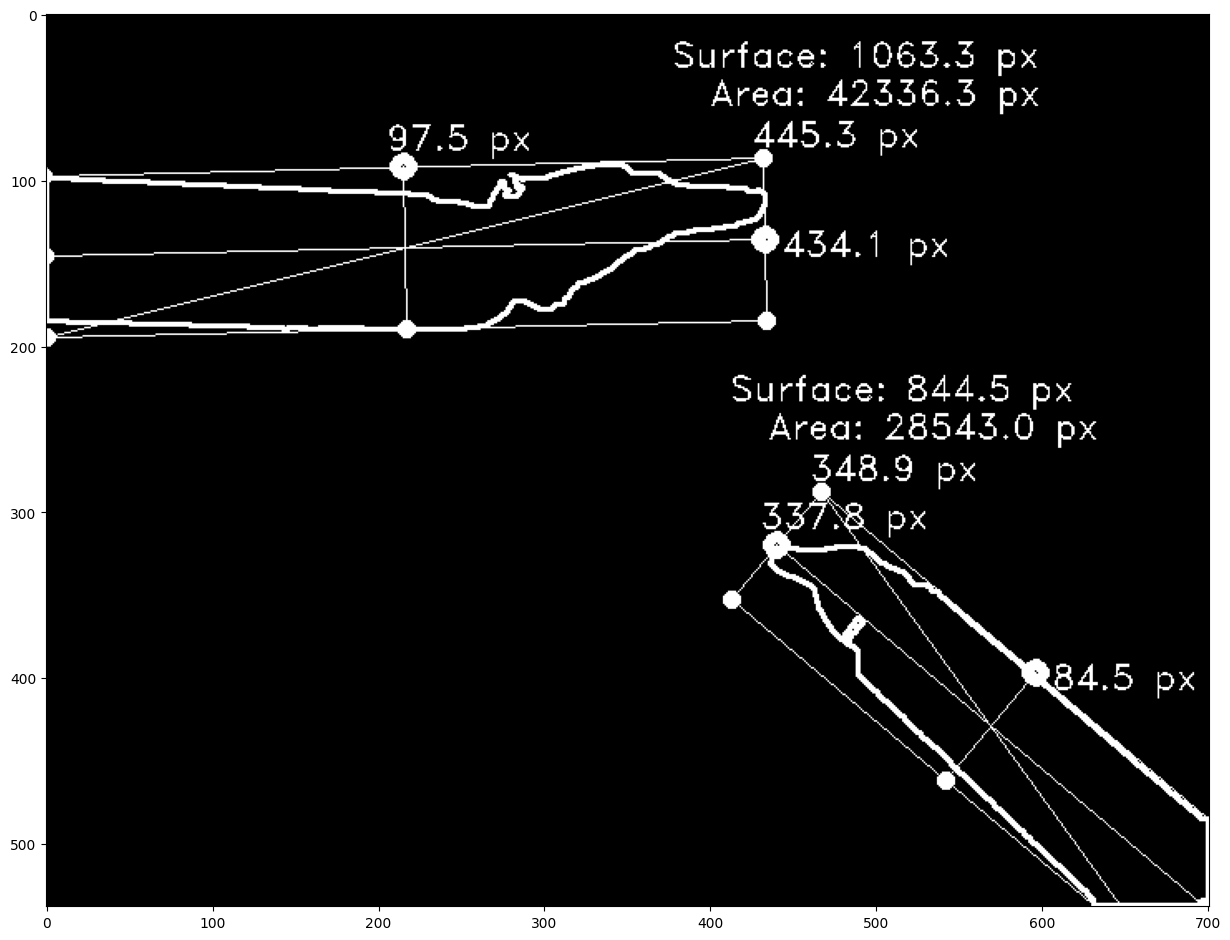

Actual area: 20947.5 px
Actual surface: 841.1 px
Actual area: 30549.0 px
Actual surface: 1092.1 px


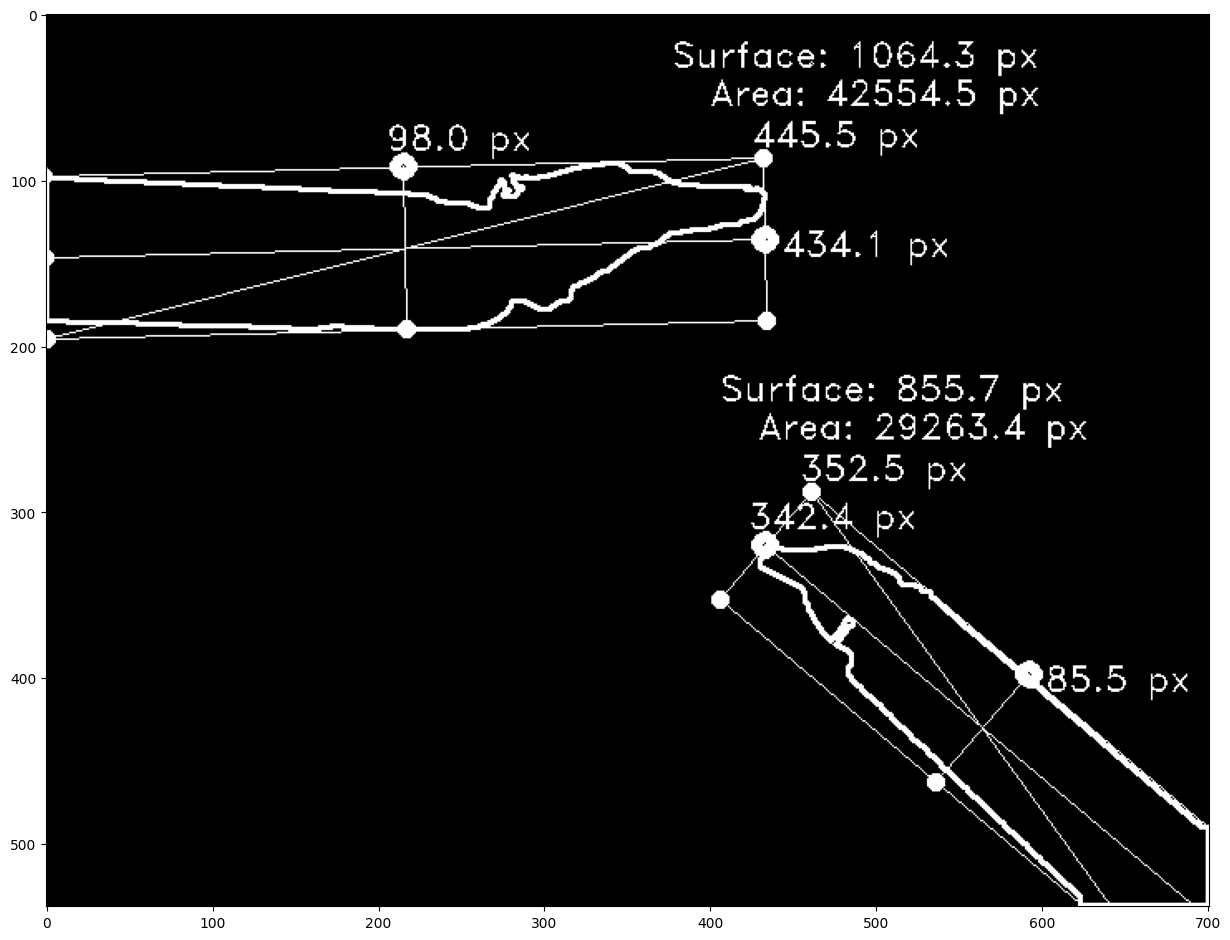

Actual area: 21680.0 px
Actual surface: 857.2 px
Actual area: 30337.0 px
Actual surface: 1126.8 px


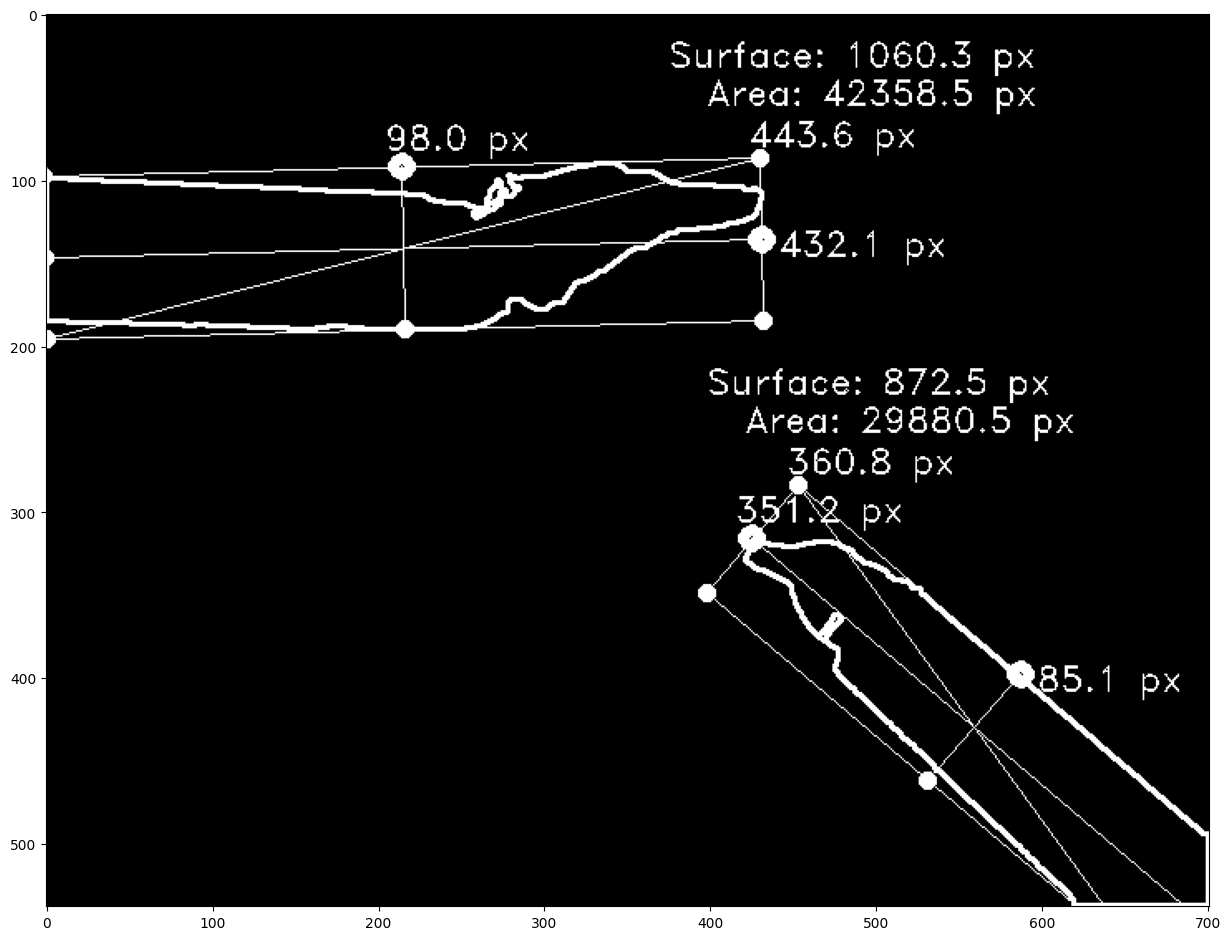

Actual area: 24685.0 px
Actual surface: 931.0 px
Actual area: 30238.5 px
Actual surface: 1088.4 px


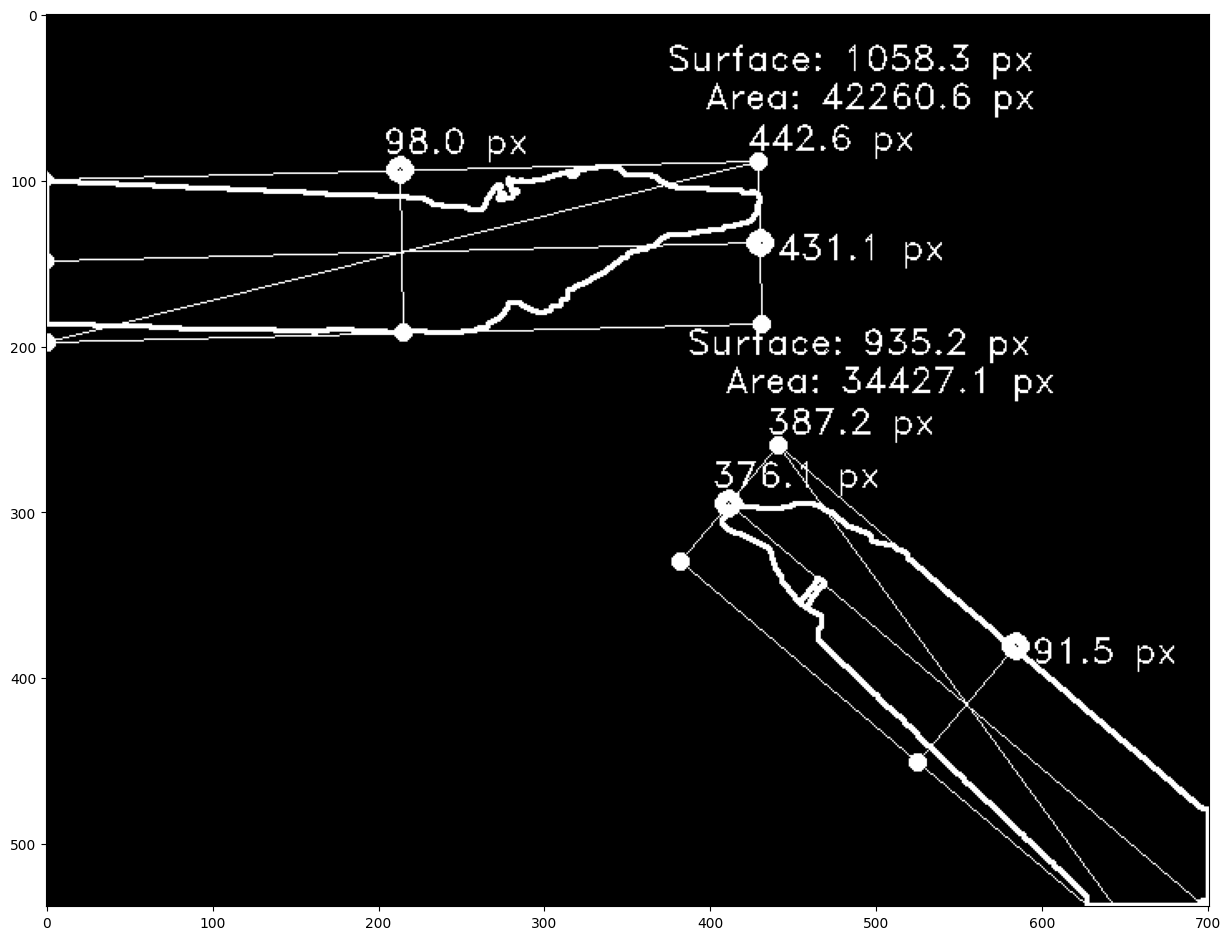

In [57]:
for i in range(len(thresh_imgs)):
    calc_img = calculate(thresh_imgs[i])
    
    #cv.putText(cont_img, "Pic #{:.1f}".format(i), (200, 200),
    #cv.FONT_HERSHEY_COMPLEX, 3, (255, 255, 255), 3)